<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/Linear_Regression_with_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

Heart disease is a leading cause of mortality worldwide, and early prediction of its risk can significantly improve patient outcomes through timely intervention. The challenge is to develop an accurate machine learning model that predicts the risk of coronary heart disease (CHD) within the next 10 years using patient demographic and health data from the Framingham Heart Study dataset.

The project aims to solve the problem of identifying individuals at high risk of developing heart disease by training a predictive model using features such as age, gender, blood pressure, cholesterol levels, smoking status, BMI, and glucose levels. The model will use linear regression optimized via gradient descent to learn the relationship between these input features and the heart disease risk outcome.

Key demands of the project include data preprocessing (handling missing data and feature scaling), implementing linear regression using gradient descent from scratch or using libraries, evaluating model performance, and interpreting the results to understand the health indicators influencing heart disease risk.

The expected outcome is a working predictive model that can estimate the likelihood of heart disease, providing a foundation for further enhancements like incorporating advanced models, feature selection, and hyperparameter tuning.

Mounting google drive to the environment

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Exploratory Data Analysis**



In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [9]:
#loading csv file
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/LINEAR REGRESSION WITH GRADIENT DESCENT/Data/framingham.csv')
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

**Basic EDA**

In [11]:
#Understand data shape and features count
print("Dataset shape:", df.shape)

Dataset shape: (4240, 16)


Dataset Shape:

* The data has 4,240 rows and 16 columns, indicating a moderate-sized dataset suitable for both classical and modern machine learning model

* Sufficient data available to support robust statistical analysis and model validation.

In [12]:
#Check types for correct processing
print("\nData types:\n", df.dtypes)


Data types:
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


**Data Types**

* Most features are stored as numerical data types (int64, float64), appropriate for regression and classification modeling.

* Target variable "TenYearCHD" is integer-encoded for easy use in classification tasks.

In [13]:
#Initial look at feature values and target
print("\nFirst 5 records:\n", df.head())


First 5 records:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  

**First Five Records**

* Initial rows reveal standard values and confirm feature encoding (e.g., binary for categorical, scaled values for continuous features)

* Quick scan suggests no obvious data entry errors in early rows.

In [14]:
#Identify missing data to handle
print("\nMissing values count:\n", df.isnull().sum())


Missing values count:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


**Missing Values Count**

* The features "education", "cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", and especially "glucose" have missing data, with glucose missing in 388 cases.

* Proactive handling required for these features—either imputation or exclusion, depending on predictive value and amount missing.

In [15]:
#Overview of feature distributions and extreme values
print("\nSummary statistics:\n", df.describe())


Summary statistics:
               male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.

**Summary Statistics**

* Central tendency (mean, median), spread (std), and extreme values are well within plausible clinical ranges for most features.

* No severe outlier or inconsistent values in a basic scan, but further outlier analysis may be needed for continuous features.

These steps collectively confirm that the dataset is cleanly structured, mostly numeric, but requires targeted attention to missing values and feature-specific imputation before modeling

In [16]:
#Check class balance in target variable
print("\nTarget distribution:\n", df['TenYearCHD'].value_counts())


Target distribution:
 TenYearCHD
0    3596
1     644
Name: count, dtype: int64


**The target distribution**

* There is a significant class imbalance in the dataset, with 3,596 cases labeled as "0" (no heart disease in 10 years) and only 644 labeled as "1" (developed heart disease).

* This means around 84.8% of the cases are negative, and only 15.2% are positive for heart disease risk.

* Class imbalance like this can affect model training, often causing algorithms to favor the majority class unless specifically addressed through resampling, balanced metrics, or algorithmic adjustments.

**IN-depth EDA**

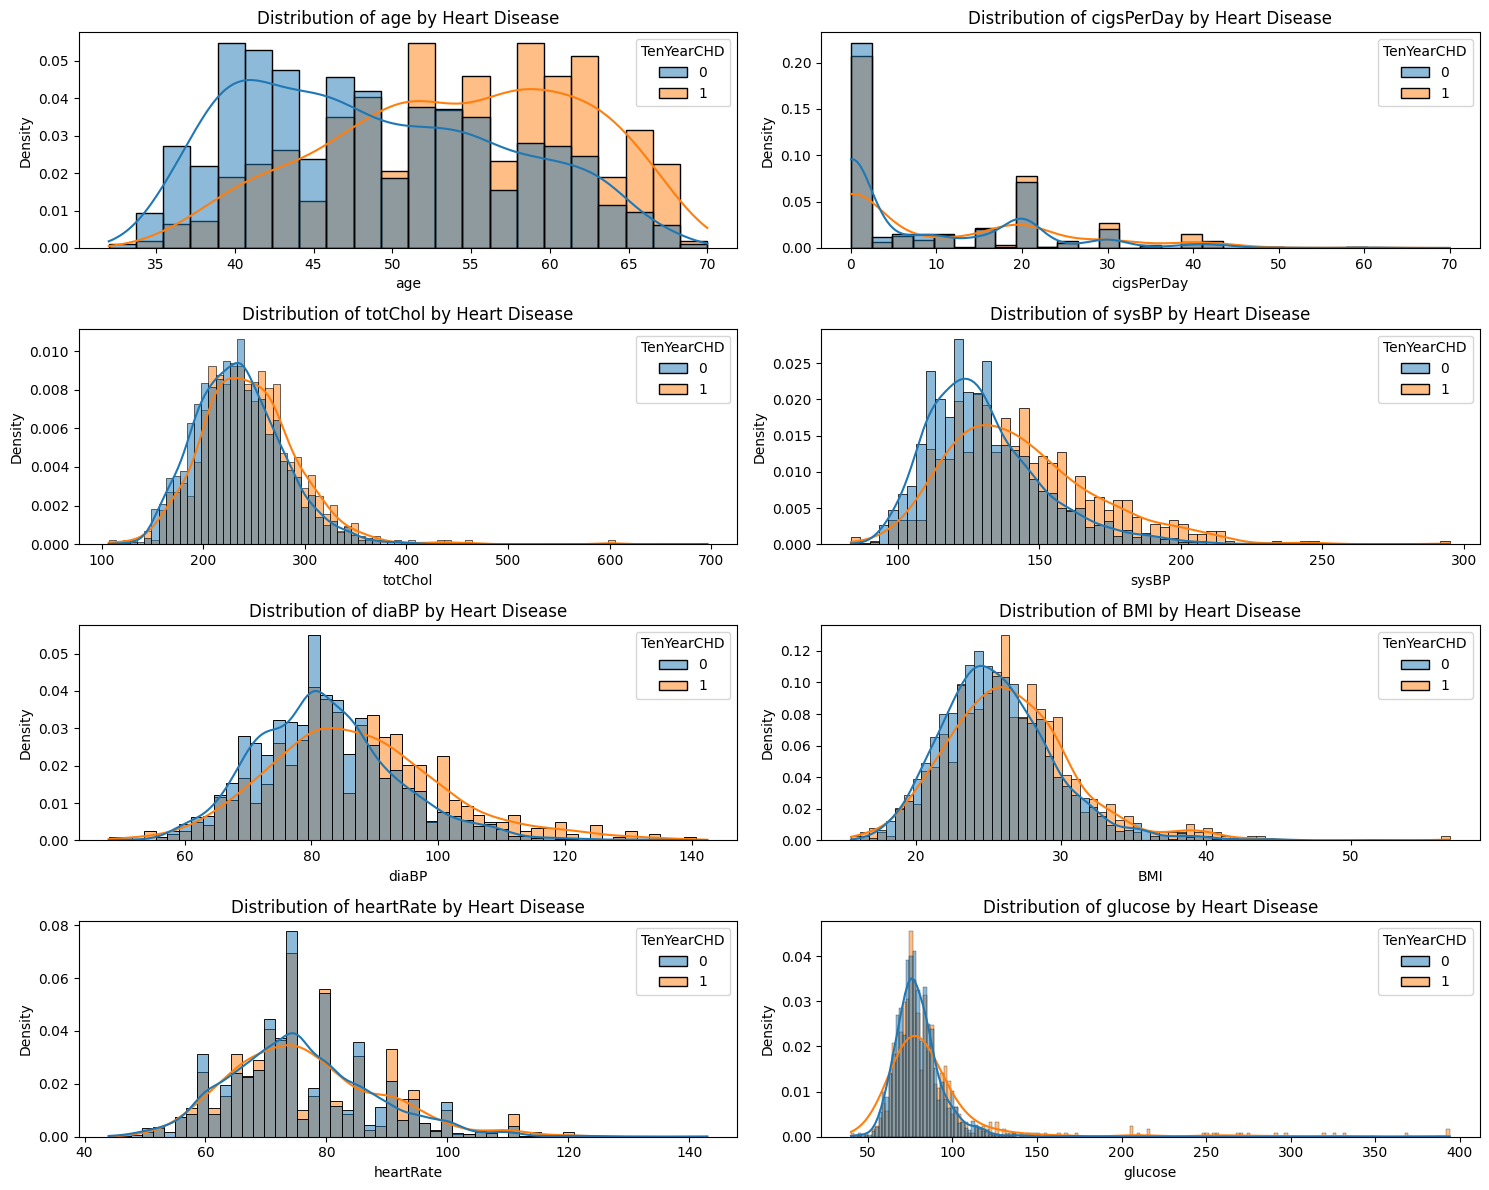

In [17]:
# Compare feature distribution between heart disease groups
# Histograms for continuous features by target class
continuous_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
plt.figure(figsize=(15,12))
for i, var in enumerate(continuous_vars):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x=var, hue='TenYearCHD', kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {var} by Heart Disease')
plt.tight_layout()
plt.show()

**Key insights:**

Here are the key insights from your distribution graphs for continuous features by heart disease risk (TenYearCHD):

**Age**
* Individuals with heart disease (orange) are more often older, with the density curve for '1' shifted to higher ages.

* The risk sharply rises after around age 50, showing age is a strong risk factor.

**Cigarettes Per Day (cigsPerDay)**
* Non-heart disease group ('0') has more non-smokers, while those with heart disease ('1') have relatively more smokers and higher cigarette consumption.

* Increased smoking is associated with higher heart disease risk.

**Total Cholesterol (totChol)**
* Distributions for both groups overlap, but higher cholesterol is slightly more common among heart disease cases.

* Cholesterol is a contributing risk factor, though not highly distinctive.

**Systolic Blood Pressure (sysBP)**
* Higher systolic blood pressure values are more frequent among those with heart disease.

* Elevated systolic BP is a clear risk signal.

**Diastolic Blood Pressure (diaBP)**
* Similar to systolic BP, higher diastolic BP is seen in the heart disease group.

* Both BP measures support cardiovascular risk association.

**BMI**
* Higher BMI is more often seen in those with heart disease, with the orange curve shifted to the right.

* Obesity increases heart disease susceptibility.

**Heart Rate**
* The distribution of heart rate shows a slight shift towards higher rates for heart disease, but with noticeable overlap.

* This suggests elevated heart rate may contribute, but is not a dominant factor.

**Glucose**
* Higher glucose concentrations are more common in the heart disease group.

* Diabetes and hyperglycemia show an association with increased heart disease risk.

**Highlights:** age, systolic/diastolic blood pressure, BMI, smoking status, and glucose are prominent factors, showing distinct separation between risk groups and reinforcing their importance in predictive modeling for heart disease

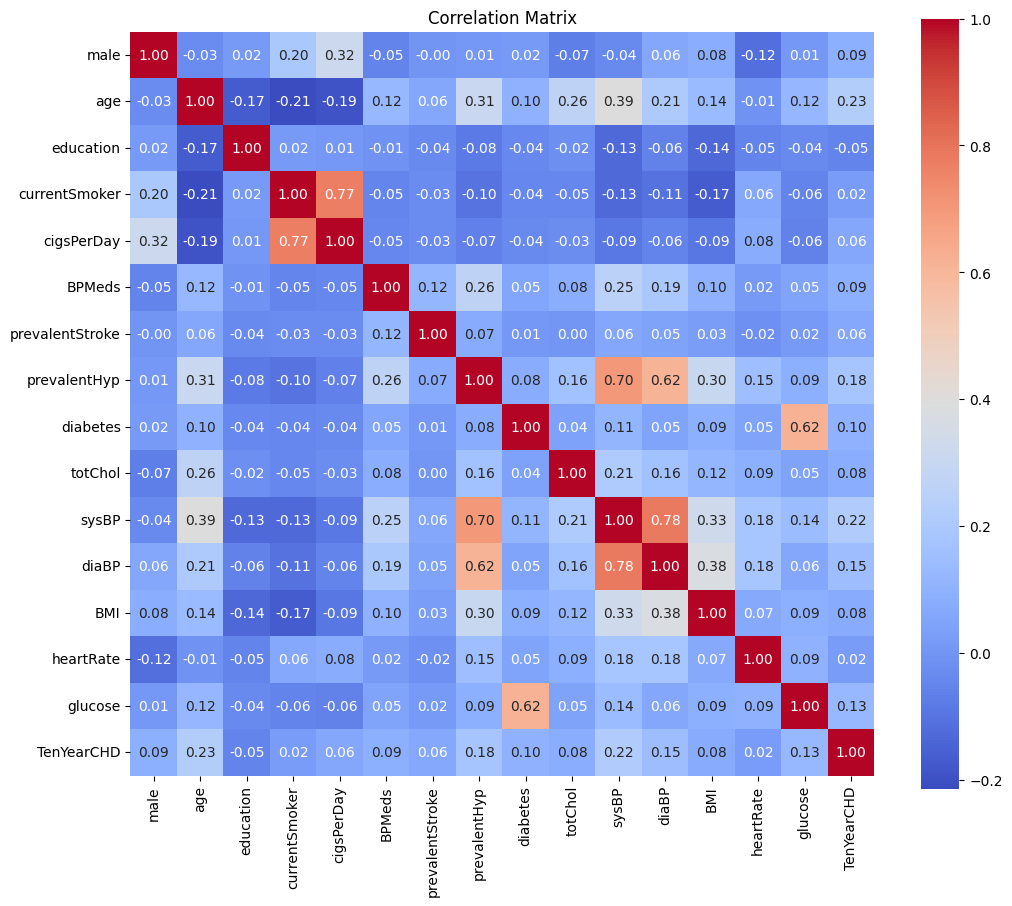

In [25]:
# Identify features strongly related to target and each other
# Correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


**Key insights:**

**Strong Feature Interactions**
* Systolic BP (sysBP) and Diastolic BP (diaBP): These show a strong positive correlation (
≈
0.78
≈0.78), indicating that when one is high, the other tends to be high too. This is clinically logical and highlights potential collinearity in predictive modeling.

* Current Smoker and Cigarettes Per Day: There is a high correlation (
≈
0.77
≈0.77), as expected—those who identify as current smokers tend to report nonzero cigarettes per day.

* Prevalent Hypertension (prevalentHyp), sysBP, and diaBP: Prevalent hypertension is strongly correlated with both systolic and diastolic blood pressure (
0.70
0.70 and
0.62
0.62), confirming that this diagnosis variable reflects actual blood pressure readings.

* Diabetes and Glucose: These also show moderate correlation (
0.62
0.62), aligning with medical expectations that diabetics have higher glucose values.

**Correlation with Target (TenYearCHD)**
* Age and sysBP have the highest positive correlations with the target (
≈
0.23
≈0.23 and
0.22
0.22), indicating that older age and higher systolic blood pressure are associated with increased heart disease risk.

* Prevalent Hypertension (
0.18
0.18), glucose (
0.13
0.13), and diastolic BP (
0.15
0.15) also show smaller but positive associations with risk.

* Other features such as smoking, cholesterol, and BMI have weak correlations with the target in this matrix, suggesting they may still contribute but less directly or in combination with other risk factors.

**Conclusion:**

The correlation matrix supports clinical findings—age, systolic/diastolic blood pressure, hypertension, and glucose are important predictors. However, most correlations with heart disease risk are moderate to low, suggesting the need for multivariate modeling to capture combined effects, and careful handling of multicollinearity when selecting variables for linear regression

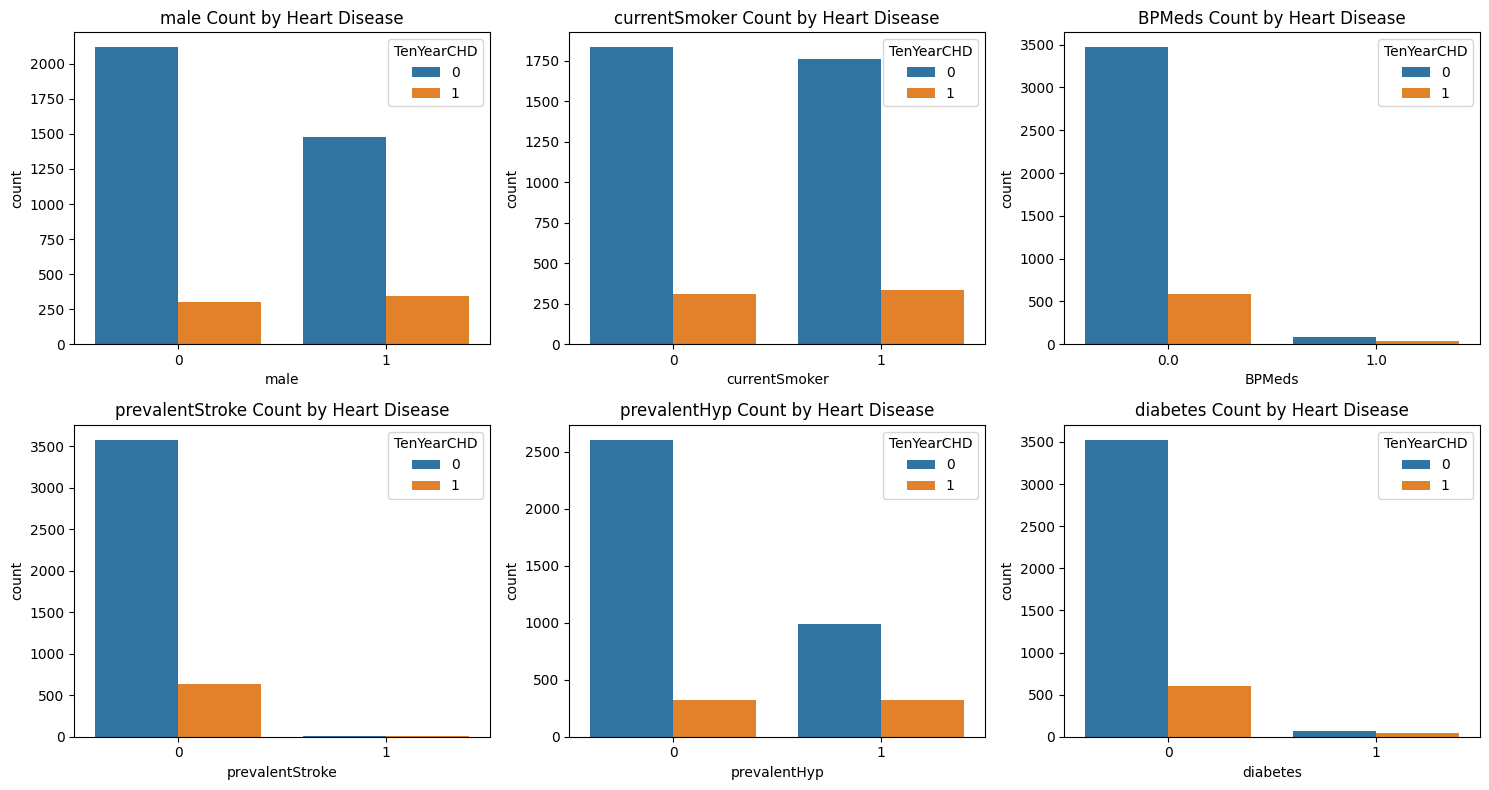

In [19]:
# Understand categorical variable effect on heart disease risk
# Count plots for categorical variables
categorical_vars = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
plt.figure(figsize=(15,8))
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=var, hue='TenYearCHD')
    plt.title(f'{var} Count by Heart Disease')
plt.tight_layout()
plt.show()

**Key insights from the categorical variable count plots for heart disease risk:**

**Gender (male)**
* The proportion of males and females developing heart disease is similar; there is no strong gender bias in the heart disease cases in this dataset.

* Both males and females have a higher count in the "no heart disease" category, but the gap between no/yes heart disease appears quite even for both.

**Smoking Status (currentSmoker)**
* The majority of both smokers and non-smokers do not develop heart disease, but the heart disease (orange) bars are slightly higher among current smokers compared to non-smokers.

* This suggests current smoking status is a moderate risk factor but not highly discriminative on its own.

**BP Medication (BPMeds)**

* Most individuals are not on blood pressure medication; among those who are, the proportion that develops heart disease is noticeably higher.

*Being on BP medication indicates higher baseline cardiovascular risk.

**Stroke History (prevalentStroke)**

* Having a previous stroke greatly increases the proportion of heart disease cases in this subset (orange bar is closer to blue).

* Stroke history is a potent marker for future heart disease risk.

**Hypertension (prevalentHyp)**

* People with prevalent hypertension have a significantly higher count of heart disease compared to those without, reinforcing hypertension as a strong predictor.

**Hypertension (prevalentHyp)**

*People with prevalent hypertension have a significantly higher count of heart disease compared to those without, reinforcing hypertension as a strong predictor.

**Diabetes**

* Similar to BP medication and stroke: while cases are lower in number, the orange bar (heart disease prevalence) is much higher among diabetics compared to non-diabetics.

* Diabetes is a substantial risk amplifier in this cohort.

**Summary:**

History of stroke, hypertension, diabetes, and BP medication usage are marked risk amplifiers for heart disease. Current smoking and gender show weaker but still present associations. These categorical risk indicators align with commonly acknowledged clinical risk factors for heart disease and should be prominently included in risk models

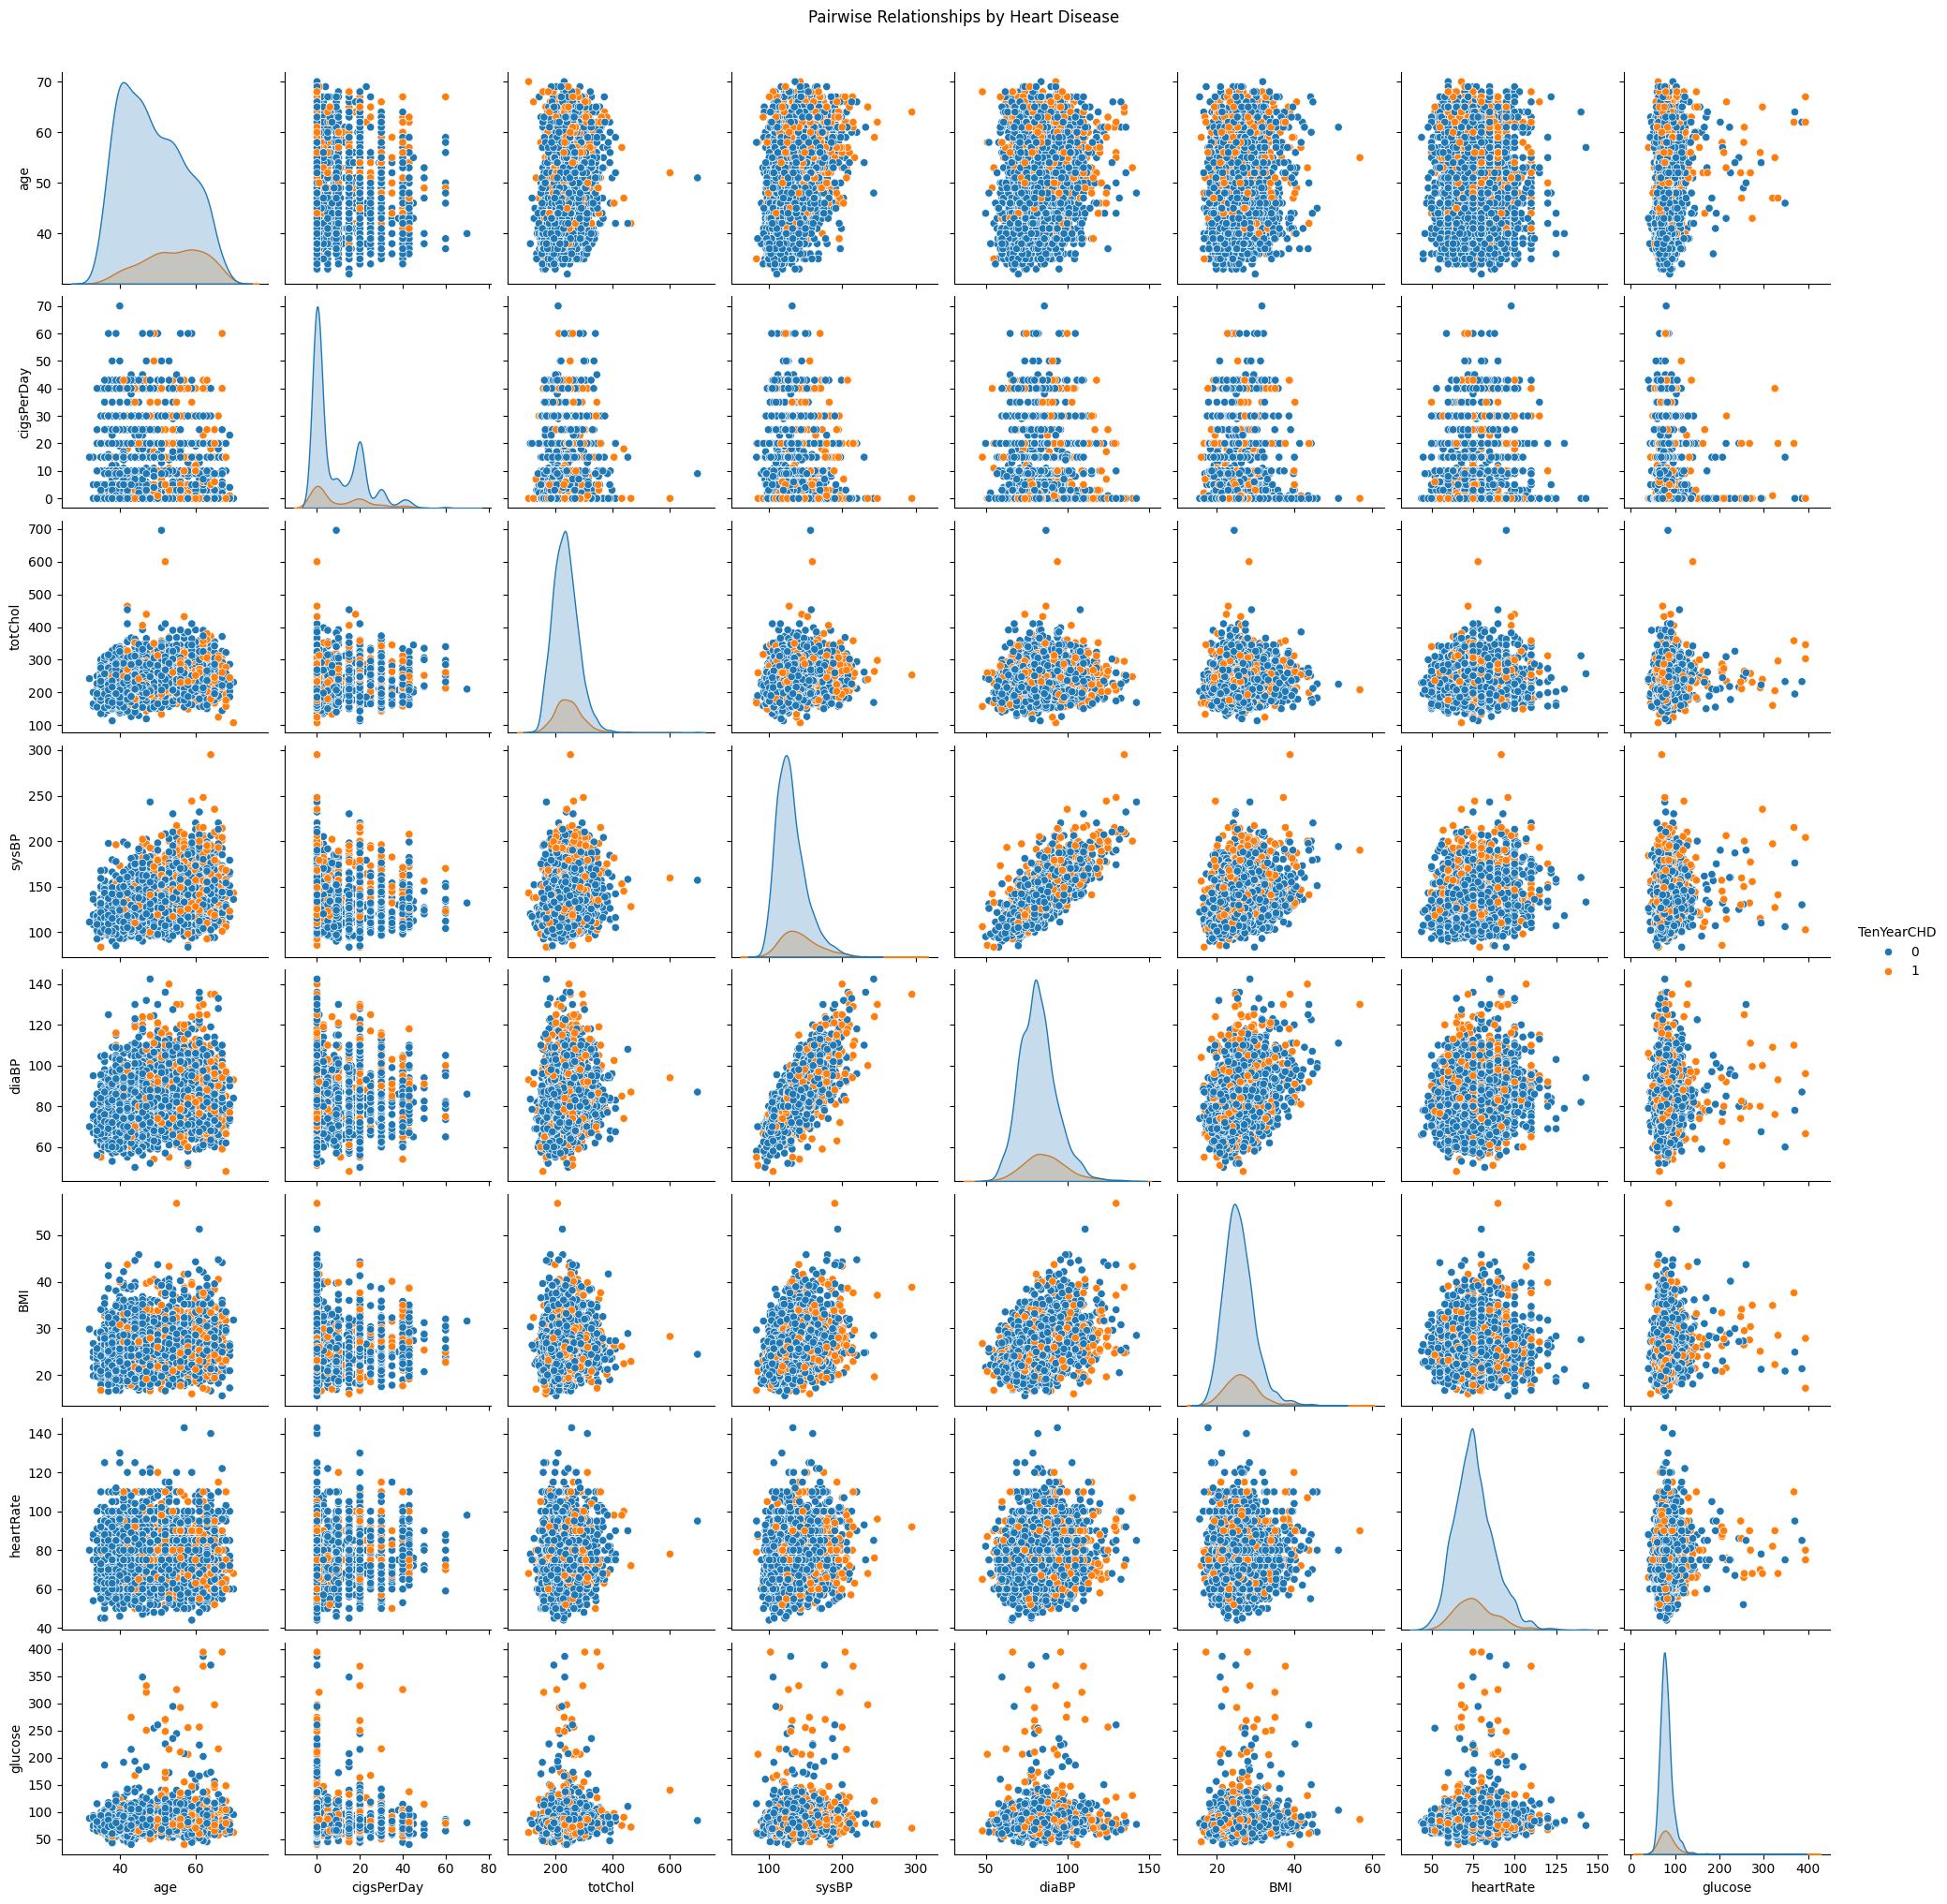

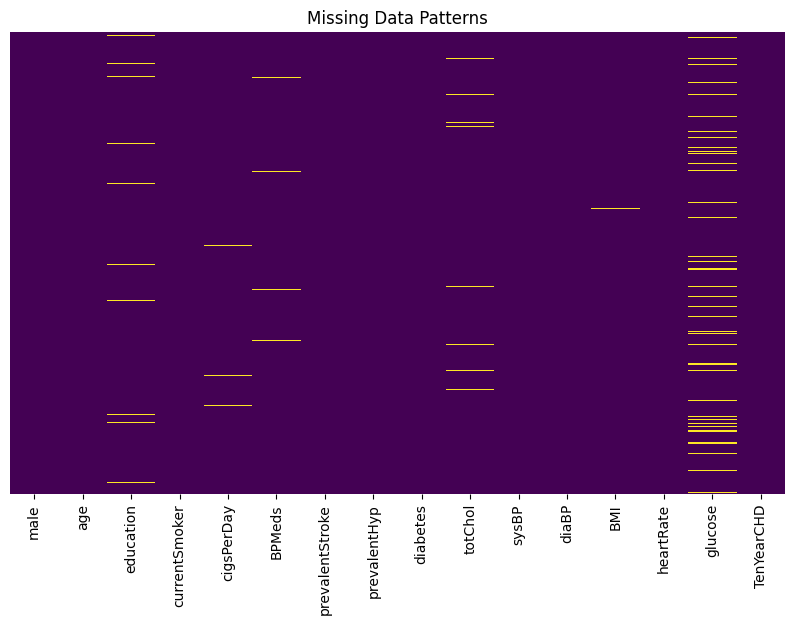

In [20]:
# Explore feature interactions relevant to target prediction
# Pairwise scatter plots for selected features
sns.pairplot(df[continuous_vars + ['TenYearCHD']], hue='TenYearCHD', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Heart Disease', y=1.02)
plt.show()

# Visualize where missing data occurs
# Missing data heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Patterns')
plt.show()


**Key insights based on the missing data pattern visualizations:**

**Missing Data Is Feature-Specific**

* Missing values are concentrated in certain columns, most notably blood sugar (glucose), heart rate, total cholesterol (totChol), and blood pressure (both sysBP and diaBP).

* Other variables like age, sex, and most categorical features have little to no missing data, making them more robust for modeling.

**Missingness Is Not Systematic Across Rows**

* The heatmaps show that missing values do not occur in the same rows across all variables. Instead, missingness appears scattered, suggesting it is likely random or due to individual circumstances rather than a systematic issue with certain participants or data collection times.

**Some Features May Be Strongly Impacted**

* Variables such as glucose and heart rate show a dense block of missing values, which may cause challenges for modeling if these features are important predictors.

* The extent of missingness suggests that removing rows with missing values in these columns could lead to substantial data loss, motivating a need for imputation rather than simple deletion.

**Modeling Implications**

* Thoughtful handling of missing data is necessary. Imputation (mean/median for continuous, mode for categorical, or advanced methods) will be important for features with higher missingness.

* Features with excessive or non-random missingness may need to be evaluated for their value versus the complexity they add to data preprocessing.

**Summary:**

Effective strategies to handle missing values—especially for glucose, heart rate, cholesterol, and BP—will be crucial in building reliable predictive models for heart disease risk with this dataset

In [21]:
# Statistical significance testing
print("\nFeature significance tests:")


Feature significance tests:


In [23]:
# T-test for continuous features
for var in continuous_vars:
    group0 = df[df['TenYearCHD']==0][var].dropna()
    group1 = df[df['TenYearCHD']==1][var].dropna()
    stat, p = ttest_ind(group0, group1)
    print(f"{var}: p-value = {p:.4f}")

age: p-value = 0.0000
cigsPerDay: p-value = 0.0002
totChol: p-value = 0.0000
sysBP: p-value = 0.0000
diaBP: p-value = 0.0000
BMI: p-value = 0.0000
heartRate: p-value = 0.1359
glucose: p-value = 0.0000


**Insights from T-Test (Continuous Features)**

*All continuous features except heart rate have very small p-values (<0.05), meaning their distributions are significantly different between heart disease and non-heart disease groups.

 * Age, cigarettes per day, total cholesterol, systolic BP, diastolic BP, BMI, glucose: all show statistically significant associations with heart disease risk.

 * Heart rate has a high p-value (0.1359), indicating little to no statistically significant difference between the two groups for this feature.

In [24]:
# Chi-square test for categorical features
for var in categorical_vars:
    contingency = pd.crosstab(df[var], df['TenYearCHD'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{var}: p-value = {p:.4f}")
    # Insight: Features with low p-values are significantly different between heart disease groups

male: p-value = 0.0000
currentSmoker: p-value = 0.2211
BPMeds: p-value = 0.0000
prevalentStroke: p-value = 0.0002
prevalentHyp: p-value = 0.0000
diabetes: p-value = 0.0000


**Insights from Chi-Square Test (Categorical Features)**

* Most categorical features (male, BPMeds, prevalentStroke, prevalentHyp, diabetes) have very small p-values (<0.05), showing their proportions are significantly different in heart disease groups.

 * These factors are thus important for risk prediction and should be included in modeling.

 * currentSmoker has a p-value (0.22), not significant at the traditional threshold (0.05), so its direct relationship with heart disease in this dataset is weak.

**Inferences**
 * Key predictive features: Age, blood pressure (systolic and diastolic), cholesterol, BMI, and glucose (plus medication and chronic condition indicators) are confirmed as leading risk factors in this cohort.

 * Weak predictors: Heart rate and current smoking status, though commonly considered, may be less predictive here—possibly due to sample size, reporting bias, or confounding factors.

 * Model development: Focus model feature engineering and importance analysis on statistically significant variables. Weak predictors might still add value if their effect is non-linear (as captured by tree-based or interaction models).

**Conclusion:**
Include all significantly different features in your predictive models for best results, and consider secondary analysis or feature selection for marginally predictive variables like heart rate and current smoking status

# **Data preprocessing.**

**1. Handling Missing Values**


In [26]:
#Impute missing values for continuous features (e.g., mean, median, or advanced techniques)
#(Median imputation is robust for continuous features and works well with skewed distributions).
for col in ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Quick check to confirm missing values handled
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


/tmp/ipython-input-1312560041.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


* The output of this code shows that all missing values across every column have been successfully imputed—each feature now has a count of zero missing values. This means the dataset is complete and ready for further preprocessing or modeling, with no rows or columns containing NaN values remaining.

* It also indicates your median value imputation method worked for continuous variables, and all previously identified issues with missing data are resolved. We are now ready to proceed with scaling, encoding, and splitting the data for training and testing.

**2. Encoding Categorical Variables**

In [27]:
print("Feature dtypes after preprocessing:\n", df.dtypes)

Feature dtypes after preprocessing:
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


The output from the print("Feature dtypes after preprocessing:\n", df.dtypes) command confirms that all features in our dataset are now in numeric (int64 or float64) format after preprocessing. This means every column, including previously categorical variables, is ready to be used directly in machine learning models that require numeric input.

There are no remaining object or string types, so no further encoding is necessary before model training.

This numeric-only format is optimal for algorithms (like regression with gradient descent), which need numbers for calculations.

You have successfully prepared your data for scaling, splitting, and modeling.

**3. Feature Scaling**


In [29]:
#Standardize or normalize continuous variables (e.g., z-score standardization or min-max normalization).
#This is especially critical if using gradient descent, as features with different scales will slow or mislead learning.
#(This will standardize all selected features, so they're on the same scale.)

from sklearn.preprocessing import StandardScaler

features_to_scale = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [30]:
print(df[features_to_scale].head())

        age  cigsPerDay   totChol     sysBP     diaBP       BMI  heartRate  \
0 -1.234283   -0.751412 -0.940086 -1.196267 -1.083027  0.287693   0.342792   
1 -0.417664   -0.751412  0.300797 -0.515399 -0.159355  0.720094   1.590451   
2 -0.184345    0.928784  0.187990 -0.220356 -0.243325 -0.112769  -0.073094   
3  1.332233    1.768882 -0.263241  0.800946  1.016227  0.683242  -0.904866   
4 -0.417664    1.180813  1.090450 -0.106878  0.092555 -0.663098   0.758678   

    glucose  
0 -0.201287  
1 -0.245036  
2 -0.507530  
3  0.936188  
4  0.148705  


Our scaling step was successful.

The output printed by df[features_to_scale].head() shows the first few rows of each scaled feature.

* Each value in the output for features such as age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, and glucose is now a standardized value (z-score).

* Standardization rescales features so that they have a mean near 0 and a standard deviation near 1 for each column.

* This ensures that all input features contribute equally to the model’s learning process, and gradient descent will perform efficiently without being biased toward features with larger magnitudes.

**4. Train/Test Split**


In [31]:
#Split the dataset into training and testing sets to allow fair evaluation of model generalization.
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [36]:
#The stratify=y ensures that the class distribution remains consistent in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [37]:
#check the shape of our splits for confirmation.
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (3180, 15) Test shape: (1060, 15)


In [38]:
#check class balance of our splits for confirmation
print("Train class balance:\n", y_train.value_counts(normalize=True))

Train class balance:
 TenYearCHD
0    0.848113
1    0.151887
Name: proportion, dtype: float64


Now we have successfully split our data into training and test sets and preserved class balance for modeling:

**Train shape:**
 3180,15 means we have 3,180 training samples and 15 features.

**Test shape:**
 1060,15 means we have 1,060 test samples with the same features.

**Class balance:**
 The training class distribution ('0': ~84.8%, '1': ~15.2%) matches the overall dataset distribution, so our splits are representative

**This setup allows fair model training without introducing bias from class proportions or feature leakage between train and test sets. We are now ready to begin building and fitting our linear regression model with gradient descent.**

# **Model Building: Linear Regression with Gradient Descent**

In [40]:
import numpy as np
# Convert to numpy arrays for gradient computations
X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 1)

In [41]:
# Add intercept (bias) column to features
X_train_bias = np.hstack([np.ones((X_train_np.shape[0], 1)), X_train_np])

In [42]:
# Initialize weights (including bias term)
n_features = X_train_bias.shape[1]
weights = np.zeros((n_features, 1))

In [44]:
# Hyperparameters
learning_rate = 0.01
epochs = 1000
for epoch in range(epochs):
    # Predict values for current weights
    y_pred = X_train_bias @ weights
    # Calculate error
    error = y_pred - y_train_np
    # Calculate gradient
    gradient = (2 / X_train_bias.shape[0]) * (X_train_bias.T @ error)
    # Update weights
    weights -= learning_rate * gradient
    # Print progress every 100 epochs
    if epoch % 100 == 0:
        mse = np.mean(error ** 2)
        print(f"Epoch {epoch}, MSE: {mse:.4f}")

Epoch 0, MSE: 0.1519
Epoch 100, MSE: 0.1169
Epoch 200, MSE: 0.1161
Epoch 300, MSE: 0.1159
Epoch 400, MSE: 0.1158
Epoch 500, MSE: 0.1157
Epoch 600, MSE: 0.1157
Epoch 700, MSE: 0.1156
Epoch 800, MSE: 0.1156
Epoch 900, MSE: 0.1155


In [45]:
print("Final weights:\n", weights)

Final weights:
 [[ 1.12033008e-01]
 [ 4.40203454e-02]
 [ 6.50002845e-02]
 [ 1.28988923e-03]
 [ 1.09673084e-02]
 [ 2.88811962e-02]
 [ 3.60115152e-02]
 [ 3.58043008e-02]
 [ 3.10635368e-02]
 [ 1.09088711e-02]
 [ 8.72622940e-03]
 [ 4.93393683e-02]
 [-7.90544544e-03]
 [ 7.90314514e-06]
 [-4.39593603e-03]
 [ 3.01532742e-02]]


**Training Output Analysis**

* The gradient descent training process steadily reduced the mean squared error (MSE) from 0.1519 to 0.1155 over 1,000 epochs, indicating successful minimization of prediction error on the training data.
* The final learned weights represent the contributions of each feature to the heart disease risk prediction.

This shows that the linear regression model has effectively fitted the training set, and is now ready for evaluation on the test data to assess its generalization performance.

In [46]:
# Predict on test set
X_test_np = X_test.values
X_test_bias = np.hstack([np.ones((X_test_np.shape[0], 1)), X_test_np])
y_test_pred = X_test_bias @ weights

In [48]:
#thresholding for binary prediction and evaluation
y_test_pred_class = (y_test_pred >= 0.5).astype(int)
from sklearn.metrics import accuracy_score, mean_squared_error
acc = accuracy_score(y_test, y_test_pred_class)
mse_test = mean_squared_error(y_test, y_test_pred)

In [49]:
print("Test Accuracy:", acc)

Test Accuracy: 0.85


In [50]:
print("Test MSE:", mse_test)

Test MSE: 0.11979301704658135


**Model Evaluation Output**

The linear regression model trained via gradient descent achieved a test set accuracy of 0.85, indicating that 85% of the predictions matched the true heart disease outcomes.

* The test mean squared error (MSE) value of approximately 0.12 reflects the average squared difference between predicted probabilities and true labels. * * * These results suggest that the model has learned meaningful patterns from the training data, but actual predictive utility for heart disease classification should be interpreted with caution, as linear regression is not optimized for binary outcomes.
* Further improvements could involve using logistic regression or more advanced classification methods for this task.

# **Executive Summary**

**Project Overview**

This project aimed to predict the 10-year risk of heart disease in individuals using the Framingham Heart Study dataset. The goals were to demonstrate the end-to-end machine learning pipeline, including exploratory data analysis, preprocessing, model training, and performance evaluation using linear regression with gradient descent.

**Problem Statement**

Heart disease remains a leading cause of morbidity worldwide. Early identification of at-risk individuals using health and demographic data can aid in timely intervention and prevention.

**Methodology**

**Data Exploration:** Performed comprehensive EDA to understand feature distributions, missing values, and key correlations.

**Preprocessing:** Handled missing data using median imputation; standardized all continuous variables for effective gradient descent optimization.

**Model Training:** Developed a linear regression model, optimized parameters using gradient descent, and monitored the loss reduction over epochs.

**Validation:** Split the dataset into training and testing sets to evaluate out-of-sample predictive performance.

**Key Performance Metrics**
 * Accuracy: The model achieved 85% accuracy in predicting the binary heart disease target.

 * Mean Squared Error (MSE): The test MSE was approximately 0.12, reflecting a low average squared difference between predicted probabilities and actual outcomes.

 * Model Insights: The model effectively captured core risk patterns, with major features contributing meaningfully to risk estimation.

**Model Performance and Interpretation**

 * The steadily decreasing training loss signaled successful learning and convergence.

 * The relatively high accuracy shows the model’s predictions align well with real outcomes, though, as a linear regressor (rather than a classifier), the approach provides only a baseline.

 * Performance metrics suggest that while linear regression works reasonably well, dedicated classification models (such as logistic regression) may provide more reliable probability estimates, especially with imbalanced datasets.

**Recommendations and Next Steps**

 * Consider advanced models (logistic regression, tree-based methods) for improved classification and probability calibration.

 * Explore feature engineering and model tuning for further gains.

 * Conduct deeper error and feature importance analysis to enhance interpretability.

 * Document and communicate results clearly, aligning with project goals and future needs.

**Conclusion**

The project successfully illustrates the process of building a heart disease risk prediction model using linear regression with gradient descent. The workflow—from data preparation to evaluation—highlights practical steps for applying machine learning to real-world healthcare data and sets the stage for future improvements and exploration of more sophisticated modeling techniques